# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
today=datetime.datetime.now().strftime('%Y-%m-%d')


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 603


['santiago de cao',
 'kavaratti',
 'yellowknife',
 'tralee',
 'howrah',
 'ciudad lazaro cardenas',
 'margaret river',
 'afaahiti',
 'tshabong',
 'kenai',
 'lihue',
 'edinburgh of the seven seas',
 'adamstown',
 'hamilton',
 'ushuaia',
 'puerto natales',
 'port-aux-francais',
 'port alfred',
 'kapuskasing',
 'albany',
 'jamestown',
 'rignano flaminio',
 'invercargill',
 'isafjordur',
 'tazacorte',
 'new norfolk',
 'port glaud',
 'pandan',
 'tejen',
 'flin flon',
 'al hufuf',
 'queenstown',
 'orange walk',
 'port lincoln',
 'praia da vitoria',
 'port mathurin',
 'namibe',
 'chonchi',
 'san luis de la loma',
 'talnakh',
 'hawaiian paradise park',
 'tulum',
 'ust-nera',
 'novodvinsk',
 'timbuktu',
 'sandnessjoen',
 'champerico',
 'poykovskiy',
 "'ohonua",
 'stanley',
 'waitangi',
 'arraial do cabo',
 'georgetown',
 'grytviken',
 'minas de marcona',
 'rabigh',
 'yerofey pavlovich',
 'wailua homesteads',
 'tipasa',
 "st. john's",
 'udachny',
 'nova sintra',
 'lazarevskoye',
 'pico truncado',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units='metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city +"&units=" + units
    weather_response = requests.get(city_url)
    weather_json = weather_response.json()
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = weather_json

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santiago de cao
Processing Record 2 of Set 1 | kavaratti
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | tralee
Processing Record 5 of Set 1 | howrah
Processing Record 6 of Set 1 | ciudad lazaro cardenas
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | afaahiti
Processing Record 9 of Set 1 | tshabong
Processing Record 10 of Set 1 | kenai
Processing Record 11 of Set 1 | lihue
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | kapuskasing
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,santiago de cao,-7.9589,-79.2392,21.07,83,40,3.60,PE,1691032427
1,kavaratti,10.5669,72.6420,28.26,78,100,6.58,IN,1691032249
2,yellowknife,62.4560,-114.3525,15.29,72,52,3.11,CA,1691032293
3,tralee,52.2704,-9.7026,13.75,92,100,6.88,IE,1691032428
4,howrah,22.5892,88.3103,29.00,84,75,3.09,IN,1691032428


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santiago de cao,-7.9589,-79.2392,21.07,83,40,3.60,PE,1691032427
1,kavaratti,10.5669,72.6420,28.26,78,100,6.58,IN,1691032249
2,yellowknife,62.4560,-114.3525,15.29,72,52,3.11,CA,1691032293
3,tralee,52.2704,-9.7026,13.75,92,100,6.88,IE,1691032428
4,howrah,22.5892,88.3103,29.00,84,75,3.09,IN,1691032428


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

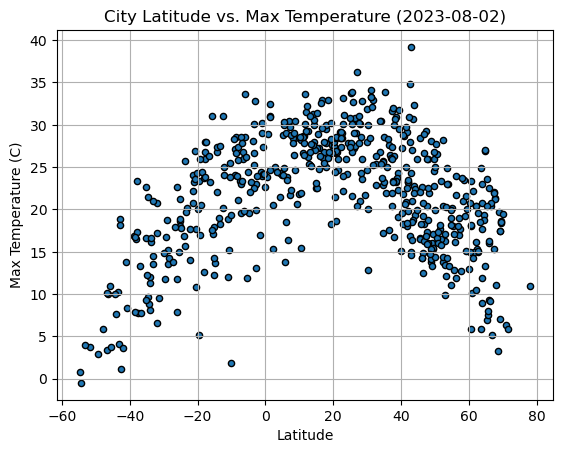

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot('Lat','Max Temp',kind='scatter',edgecolors='black')
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ({today})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

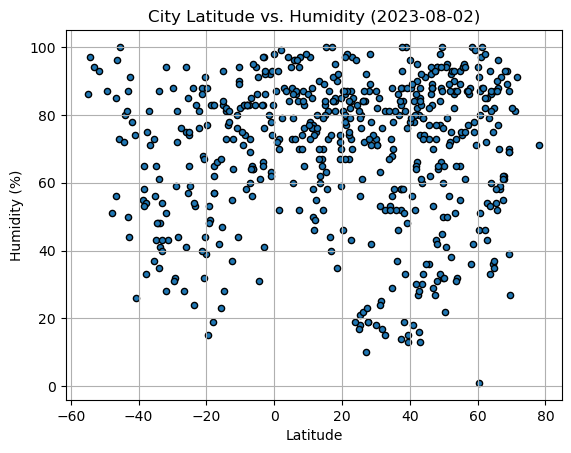

In [10]:
# Build the scatter plots for latitude vs. humidity

city_data_df.plot('Lat','Humidity',kind='scatter',edgecolors='black')
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

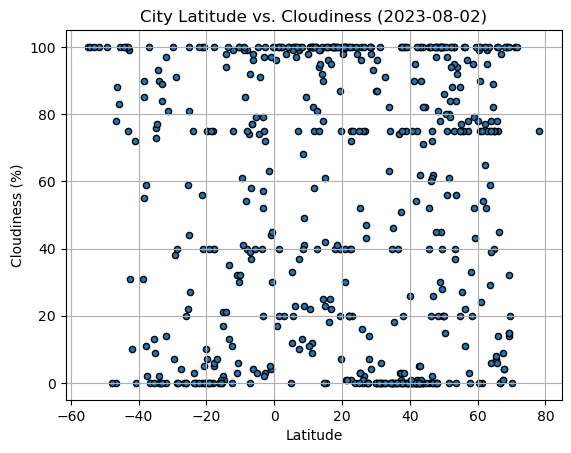

In [11]:
# Build the scatter plots for latitude vs. cloudiness

city_data_df.plot('Lat','Cloudiness',kind='scatter',edgecolors='black')
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

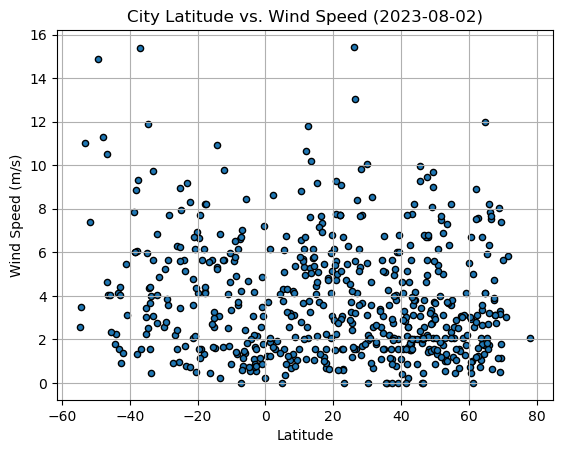

In [12]:
# Build the scatter plots for latitude vs. wind speed

city_data_df.plot('Lat','Wind Speed',kind='scatter',edgecolors='black')
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def LRp(x,y): 

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regress_values = x * slope + intercept
    print(f'The r-value is: {rvalue}')
    plt.annotate(line_eq,(min(x),min(y)),fontsize=15,color="red")
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y.name)
    
    plt.show()



In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kavaratti,10.5669,72.6420,28.26,78,100,6.58,IN,1691032249
2,yellowknife,62.4560,-114.3525,15.29,72,52,3.11,CA,1691032293
3,tralee,52.2704,-9.7026,13.75,92,100,6.88,IE,1691032428
4,howrah,22.5892,88.3103,29.00,84,75,3.09,IN,1691032428
5,ciudad lazaro cardenas,17.9583,-102.2000,27.85,81,100,0.67,MX,1691032146


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santiago de cao,-7.9589,-79.2392,21.07,83,40,3.60,PE,1691032427
6,margaret river,-33.9500,115.0667,11.26,61,90,3.67,AU,1691032428
7,afaahiti,-17.7500,-149.2833,25.93,65,5,4.17,PF,1691032163
8,tshabong,-26.0500,22.4500,7.94,75,0,6.31,BW,1691032428
11,edinburgh of the seven seas,-37.0676,-12.3116,13.35,81,100,15.36,SH,1691032428


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6102124322793487


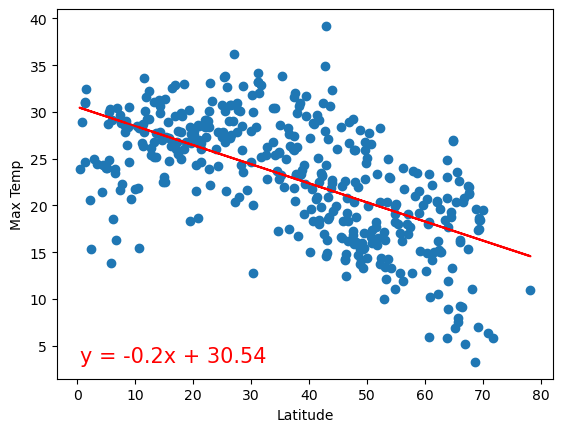

In [46]:
# Linear regression on Northern Hemisphere
LRp(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])


The r-value is: 0.7270771919229985


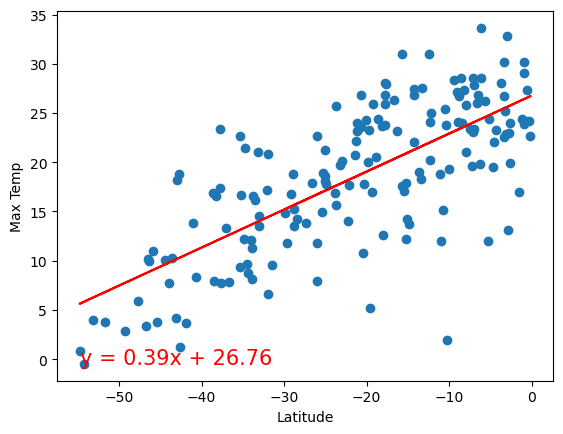

In [45]:
# Linear regression on Southern Hemisphere
LRp(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.08119996976582058


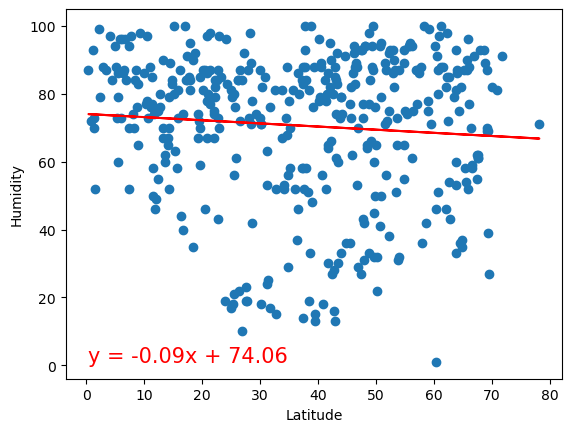

In [47]:
# Northern Hemisphere

LRp(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])


The r-value is: 0.15175385319784573


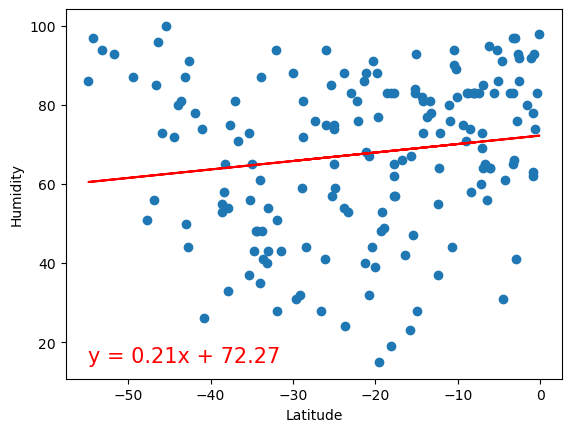

In [48]:
# Southern Hemisphere

LRp(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.07821630379016895


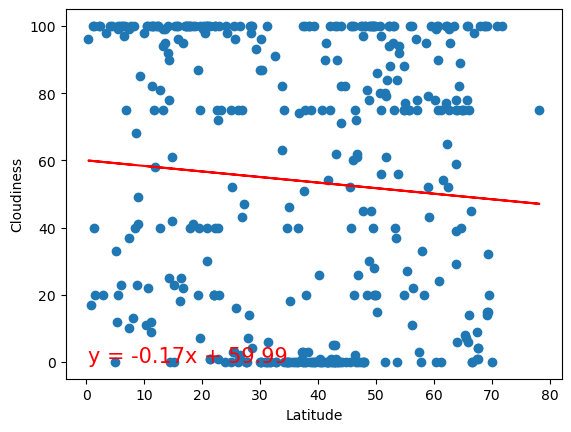

In [49]:
# Northern Hemisphere

LRp(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])


The r-value is: -0.052996896306684894


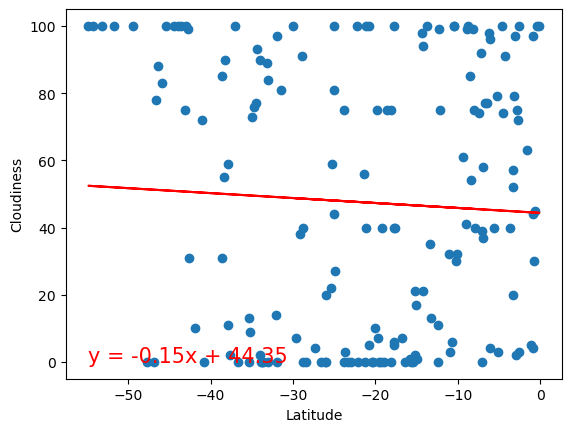

In [50]:
# Southern Hemisphere

LRp(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.08413311478052926


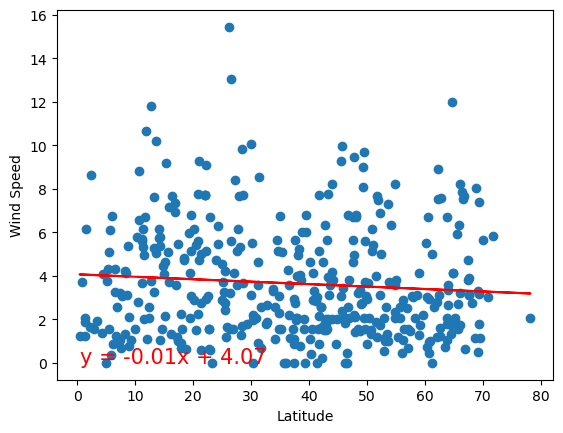

In [51]:
# Northern Hemisphere

LRp(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])


The r-value is: -0.29956687676113486


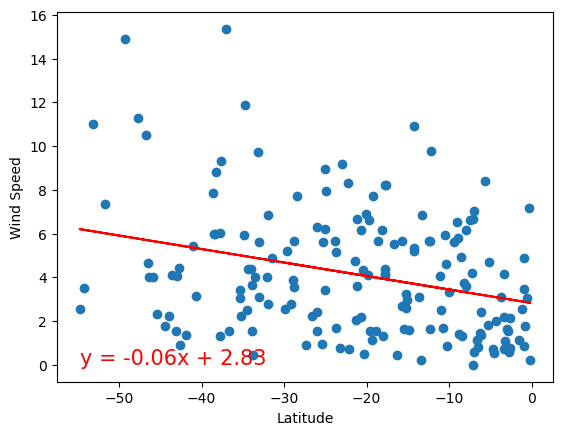

In [52]:
# Southern Hemisphere

LRp(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE